Practice

Goal
Apply the three steps of data analysis on the <Flourishing> dataset.

Exercise 1
Explore univariate descriptive analysis.

Exercise 2
Explore bivariate descriptive analysis.

Exercise 3
Apply supervised learning on a quantitative outcome variable (recommended: Flow). With a linear regression model and a K nearest neighbors regressor (KNN) model

Exercise 4
Apply supervised learning on a categorical outcome variable (recommended: Flow). With a logistic regression model and a K nearest neighbors classifier (KNN) model

Exercise 5
Apply unsupervised learning on the observations (rows).
Explore links between the emerging classes and the flourishing states and use it to draw a final interpretation.

Exercise 6
Apply unsupervised learning on the variables (columns).
See If you can draw some interpretation…


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import scipy.stats as stats

In [ ]:
PATH = r'.\.\.\...' # r是转义字符

In [5]:
# os.chdir =
df_ini = pd.read_excel('./data/Flourishing_248_HD - Copy.xlsx')

In [6]:
df = df_ini.copy()

In [7]:
df

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33
...,...,...,...,...,...,...,...,...,...,...,...
243,242,37,6,1,3,1,22,2,43,1.650000,21
244,318,31,6,2,3,1,21,2,35,0.384615,21
245,502,29,6,2,1,1,39,1,25,0.527778,33
246,98,59,5,1,2,1,31,1,28,0.585366,26


In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          248 non-null    int64  
 1   age         248 non-null    int64  
 2   education   248 non-null    int64  
 3   sex         248 non-null    int64  
 4   famstatus   248 non-null    int64  
 5   pro_cat     248 non-null    int64  
 6   pro_quant   248 non-null    int64  
 7   priv_cat    248 non-null    int64  
 8   priv_quant  248 non-null    int64  
 9   positivity  248 non-null    float64
 10  flow        248 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


None

In [9]:
df.describe()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,245.201613,41.685484,4.616935,1.608871,2.536290,2.052419,50.612903,2.225806,55.987903,1.812982,32.951613
std,155.254472,10.154568,1.538453,0.488990,0.757348,0.597967,13.431614,0.537481,11.613367,0.803469,6.599417
min,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000,23.000000,0.384615,13.000000
25%,107.500000,34.000000,3.000000,1.000000,2.000000,2.000000,41.000000,2.000000,48.000000,1.272727,29.000000
50%,229.000000,40.000000,5.000000,2.000000,3.000000,2.000000,50.000000,2.000000,56.000000,1.720000,33.000000
75%,387.500000,49.000000,6.000000,2.000000,3.000000,2.000000,61.000000,3.000000,64.000000,2.170455,37.000000
max,513.000000,72.000000,6.000000,2.000000,3.000000,3.000000,82.000000,3.000000,83.000000,5.000000,48.000000


In [10]:
columns_to_convert_indices = [0,3,4,5,7]  
df.iloc[:, columns_to_convert_indices] = df.iloc[:, columns_to_convert_indices].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          248 non-null    category
 1   age         248 non-null    int64   
 2   education   248 non-null    int64   
 3   sex         248 non-null    category
 4   famstatus   248 non-null    category
 5   pro_cat     248 non-null    category
 6   pro_quant   248 non-null    int64   
 7   priv_cat    248 non-null    category
 8   priv_quant  248 non-null    int64   
 9   positivity  248 non-null    float64 
 10  flow        248 non-null    int64   
dtypes: category(5), float64(1), int64(5)
memory usage: 23.8 KB


In [12]:
df.nunique()
# unique只对Series对象可用，dataframe需要nunique函数

ID            248
age            44
education       6
sex             2
famstatus       3
pro_cat         3
pro_quant      58
priv_cat        3
priv_quant     52
positivity    192
flow           33
dtype: int64

In [13]:
def ceil_up(x):
    assert x >= 0
    if x <= 3:
        x = np.ceil(x)
    elif x > 3:
        x = 4
    return int(x)

df['pos_cat'] = df['positivity'].apply(ceil_up).astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          248 non-null    category
 1   age         248 non-null    int64   
 2   education   248 non-null    int64   
 3   sex         248 non-null    category
 4   famstatus   248 non-null    category
 5   pro_cat     248 non-null    category
 6   pro_quant   248 non-null    int64   
 7   priv_cat    248 non-null    category
 8   priv_quant  248 non-null    int64   
 9   positivity  248 non-null    float64 
 10  flow        248 non-null    int64   
 11  pos_cat     248 non-null    category
dtypes: category(6), float64(1), int64(5)
memory usage: 24.2 KB


In [15]:
df

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,pos_cat
0,344,72,6,2,2,3,82,3,83,4.142857,44,4
1,317,45,6,2,2,3,81,3,83,4.000000,44,4
2,444,43,5,1,1,3,79,3,78,5.000000,47,4
3,270,60,2,2,3,3,79,3,82,4.666667,42,4
4,52,49,2,2,2,3,77,3,73,2.285714,33,3
...,...,...,...,...,...,...,...,...,...,...,...,...
243,242,37,6,1,3,1,22,2,43,1.650000,21,2
244,318,31,6,2,3,1,21,2,35,0.384615,21,1
245,502,29,6,2,1,1,39,1,25,0.527778,33,1
246,98,59,5,1,2,1,31,1,28,0.585366,26,1


In [16]:
# df['sex'].replace({1: 'male', 2:'female'}, inplace=True)
# df['education'].replace({1:'BAC-1', 2:'BAC', 3:'BAC+2', 4:'BAC+3', 5:'BAC+4', 6:'BAC+5'})

In [17]:
# numerical_columns = df2.select_dtypes(include=['number'])
# non_numerical_columns = df2.select_dtypes(exclude=['number'])
# print("Numerical Columns:")
# print(numerical_columns.columns.tolist())
# print("Categorical Columns:")
# print(non_numerical_columns.columns.tolist())

## *Exercise 1* - Explore univariate descriptive analysis.

### Categorical 

In [118]:
def pie_chart(col, map, explode, colors):
    
    col = col.map(map)
    
    label = col.value_counts().index
    size = col.value_counts().values
    
    plt.pie(size, labels=label, explode = explode, shadow=True, colors = colors, autopct='%1.1f%%', startangle=0)
    
    plt.axis('equal')
    # plt.legend(label, loc='best')
    plt.show()

In [119]:
def bar_chart(col, map, colors):
    
    col = col.map(map)
    
    labels = col.value_counts().index
    sizes = col.value_counts().values
    
    plt.barh(labels, sizes, color = colors)
    for i, v in enumerate(sizes):
        plt.text(v + 1, i, str(v), color='black', va='center')
    plt.show()

In [18]:
def pie_bar(col, map, explode, colors):
    col = col.map(map)
    
    label = col.value_counts().index
    size = col.value_counts().values
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (11,4), facecolor='white', dpi=80)
    ax[0].pie(size, labels=label, explode = explode, shadow=True, colors = colors, autopct='%1.1f%%', startangle=0)
    ax[0].set_title(f'Pie-chart of {col.name}')
    ax[0].set_xlabel(col.name.upper())
    ax[0].set_ylabel('Pct')
    
    ax[1].barh(label, size, color = colors)
    for i, v in enumerate(size):
        ax[1].text(v + 1, i, str(v), color='black', va='center')
    ax[0].set_title(f'Bar-chart of {col.name}')
    ax[0].set_xlabel(col.name.upper())
    ax[0].set_ylabel('Count')
    
    # ax[1].tick_params(axis='y', labelrotation=90)
    # ax[1].set_yticklabels(label, rotation=90)

    
    
    plt.subplots_adjust(wspace=.6)
    
    plt.show()
    

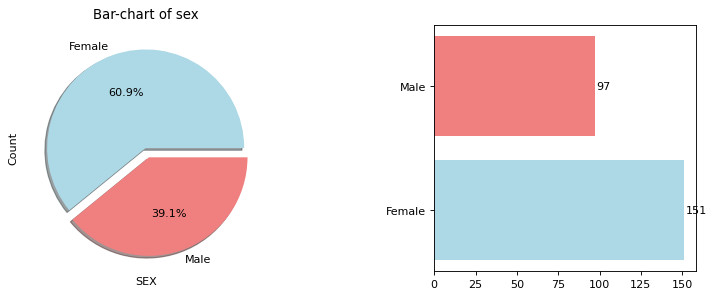

In [19]:
# 创建映射字典
map = {1: 'Male', 2: 'Female'}
explode = (0, 0.1)
colors = ['lightblue', 'lightcoral']
# pie_chart(df['sex'], map, explode, colors)
# bar_chart(df['sex'], map, colors)
pie_bar(df['sex'], map, explode, colors)

In [20]:
# map = {1:'BAC-1', 2:'BAC', 3:'BAC+2', 4:'BAC+3', 5:'BAC+4', 6:'BAC+5'}
# explode = (0.1, 0.1,0.1 , 0.1, 0.1, 0.1)
# colors = ['green', 'blue', 'red', 'orange', 'purple', 'gray']
# # pie_chart(df['education'], map, explode, colors)
# # bar_chart(df['education'], map, colors)
# pie_bar(df['education'], map, explode, colors)

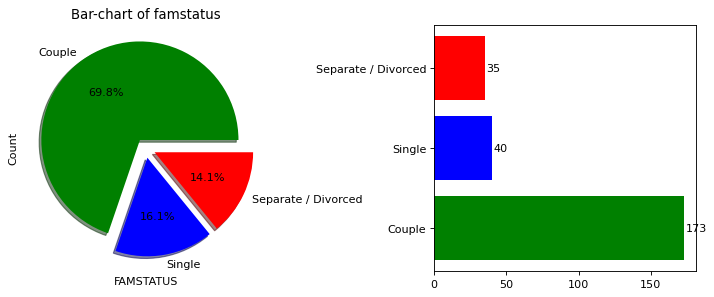

In [21]:
map = {1:'Single', 2:'Separate / Divorced', 3:'Couple'}
explode = (0.1, 0.1, 0.1)
colors = ['green', 'blue', 'red']
# pie_chart(df['famstatus'], map, explode, colors)
# bar_chart(df['famstatus'], map, colors)
pie_bar(df['famstatus'], map, explode, colors)

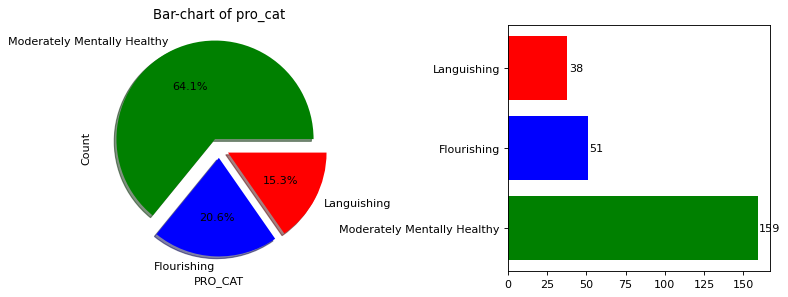

In [22]:
map = {1:'Languishing', 2:'Moderately Mentally Healthy', 3:'Flourishing'}
explode = (0.1, 0.1, 0.1)
colors = ['green', 'blue', 'red']
# pie_chart(df['pro_cat'], map, explode, colors)
# bar_chart(df['pro_cat'], map, colors)
pie_bar(df['pro_cat'], map, explode, colors)

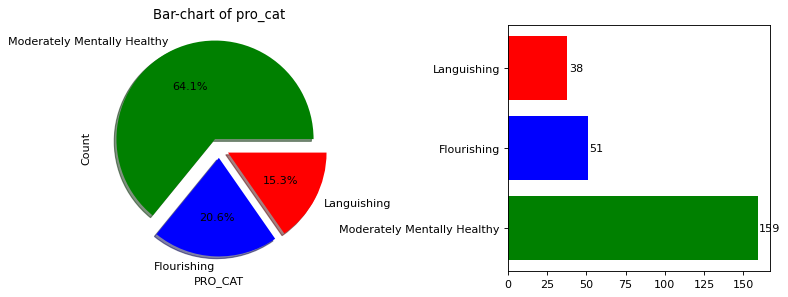

In [23]:
map = {1:'Languishing', 2:'Moderately Mentally Healthy', 3:'Flourishing'}
explode = (0.1, 0.1, 0.1)
colors = ['green', 'blue', 'red']
# pie_chart(df['pro_cat'], map, explode, colors)
# bar_chart(df['pro_cat'], map, colors)
pie_bar(df['pro_cat'], map, explode, colors)

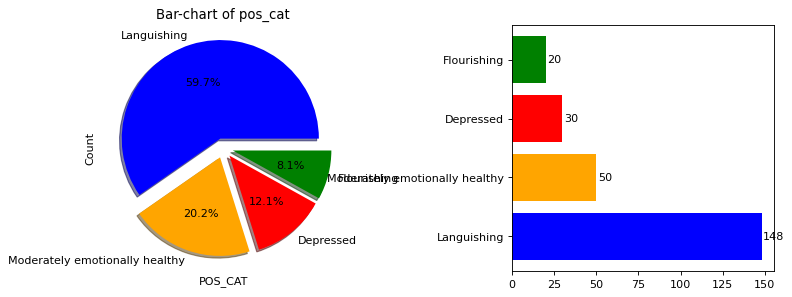

In [24]:
map = {1:'Depressed', 2:'Languishing', 3:'Moderately emotionally healthy', 4:'Flourishing'}
explode = (0.1, 0.1, 0.1, 0.1)
colors = ['blue', 'orange', 'red', 'green']
# pie_chart(df['pos_cat'], map, explode, colors)
# bar_chart(df['pos_cat'], map, colors)
pie_bar(df['pos_cat'], map, explode, colors)

In [25]:
def hist_box(col):
    
    fig, ax = plt.subplots(1,2, figsize = (8,4), facecolor='white', dpi=100)
    
    #ax1
    sns.histplot(data=col, kde=True, bins=50, color='skyblue', edgecolor='black', ax=ax[0])
    ax[0].set_title(f'Histogramme of {col.name}')
    ax[0].set_xlabel(col.name.upper())
    ax[0].set_ylabel('Count')
    
    #ax2
    boxplot = ax[1].boxplot(col, vert=True, patch_artist=True, boxprops={'facecolor': 'lightcoral'})
    #Find outliers
    outliers = [flier.get_ydata() for flier in boxplot['fliers']]
    for outlier in outliers:
        for value in outlier:
            ax[1].annotate(str(value), (1, value), textcoords='offset points', xytext=(10, 0), va='center', fontsize=8, color='red')
    ax[1].set_title(f'Boxplot of {col.name}')
    ax[1].set_xlabel(col.name.upper())
    
    plt.tight_layout()
    plt.show()

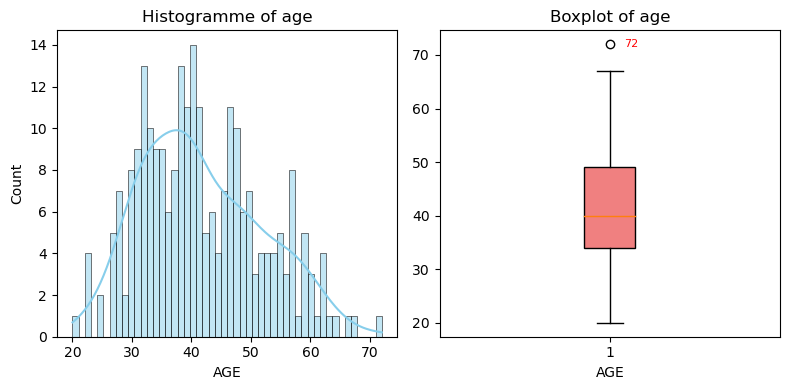

In [26]:
hist_box(df['age'])

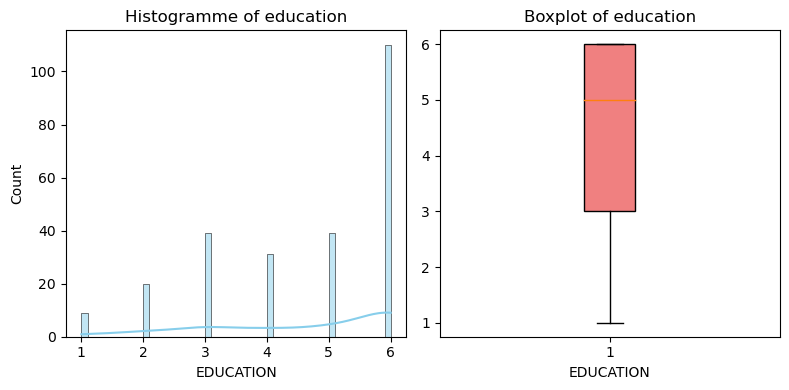

In [27]:
hist_box(df['education'])

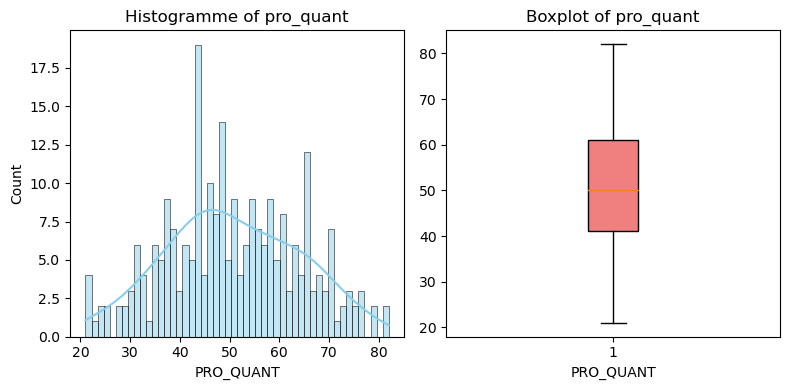

In [28]:
hist_box(df['pro_quant'])

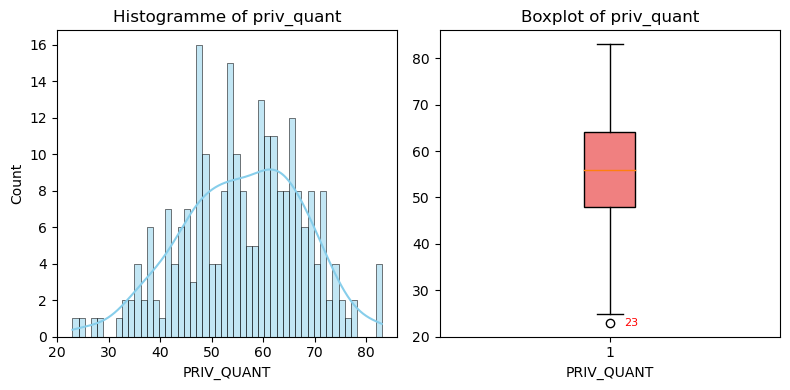

In [29]:
hist_box(df['priv_quant'])

In [30]:
df['sex'].describe()

count     248
unique      2
top         2
freq      151
Name: sex, dtype: int64

---

---

Cramer's V : $$V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}}$$

In [110]:
def cat_cat_analysis(data, var1, var2):
    # 1.1 Generate the contingency table
    contingency_table = pd.crosstab(data[var1], data[var2])

    # 1.2 Check the significance of their relationship with the chi-square test
    chi2, p, dof, expected_freq = stats.chi2_contingency(contingency_table)
    
    # Calculate Cramer's V
    n = contingency_table.values.sum()
    k = contingency_table.shape[0]
    r = contingency_table.shape[1]
    V = np.sqrt(chi2 / (n * min(k-1, r-1)))
    print("Cramer's V:", V)
    
    observed_table = contingency_table  # 观察表就是生成的列联表
    expected_table = expected_freq
    n = contingency_table.values.sum()  # 总样本数
    
    residual_table = (observed_table - expected_table) / np.sqrt(expected_table)

    # 输出观察表、期望表和残差表
    print("Observed Table:")
    print(observed_table)
    print("\nExpected Table:")
    print(expected_table)
    print("\nResidual Table:")
    print(residual_table)
        
    # 1.3 Plot side-by-side bar charts
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Side-by-Side Bar Chart for {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel('Frequency')
    plt.show()

    # 1.4 Plot stacked bar charts
    contingency_table.T.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Chart for {var2} vs {var1}')
    plt.xlabel(var2)
    plt.ylabel('Frequency')
    plt.show()

    # Return chi-squared statistic and p-value
    return chi2, p, dof


In [107]:
df

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,pos_cat
0,344,72,6,1,2,3,82,3,83,4.142857,44,4
1,317,45,6,1,2,3,81,3,83,4.000000,44,4
2,444,43,5,0,1,3,79,3,78,5.000000,47,4
3,270,60,2,1,3,3,79,3,82,4.666667,42,4
4,52,49,2,1,2,3,77,3,73,2.285714,33,3
...,...,...,...,...,...,...,...,...,...,...,...,...
243,242,37,6,0,3,1,22,2,43,1.650000,21,2
244,318,31,6,1,3,1,21,2,35,0.384615,21,1
245,502,29,6,1,1,1,39,1,25,0.527778,33,1
246,98,59,5,0,2,1,31,1,28,0.585366,26,1


In [109]:
contingency_table = pd.crosstab(df['famstatus'],df['priv_cat'])
observed_table = contingency_table  # 观察表就是生成的列联表
expected_table = pd.DataFrame(0, index=contingency_table.index, columns=contingency_table.columns)
n = contingency_table.values.sum()  # 总样本数
print(contingency_table)
print('\n')
print(n)

priv_cat   1    2   3
famstatus            
1          6   25   9
2          3   25   7
3          5  114  54


248


In [108]:

contingency_table = pd.crosstab(df['famstatus'],df['priv_cat'])
observed_table = contingency_table  # 观察表就是生成的列联表
expected_table = pd.DataFrame(0, index=contingency_table.index, columns=contingency_table.columns)
n = contingency_table.values.sum()  # 总样本数

# 计算期望表
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        expected_table.iloc[i, j] = (contingency_table.iloc[i, :].sum() * contingency_table.iloc[:, j].sum()) / n

# 计算残差表
residual_table = (observed_table - expected_table) / np.sqrt(expected_table)

# 输出观察表、期望表和残差表
print("Observed Table:")
print(observed_table)
print("\nExpected Table:")
print(expected_table)
print("\nResidual Table:")
print(residual_table)

Observed Table:
priv_cat   1    2   3
famstatus            
1          6   25   9
2          3   25   7
3          5  114  54

Expected Table:
priv_cat          1           2          3
famstatus                                 
1          2.258065   26.451613  11.290323
2          1.975806   23.145161   9.879032
3          9.766129  114.403226  48.830645

Residual Table:
priv_cat          1         2         3
famstatus                              
1          2.490165 -0.282244 -0.681622
2          0.728635  0.385546 -0.915987
3         -1.525122 -0.037699  0.739759


In [92]:
df

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,pos_cat
0,344,72,6,1,2,3,82,3,83,4.142857,44,4
1,317,45,6,1,2,3,81,3,83,4.000000,44,4
2,444,43,5,0,1,3,79,3,78,5.000000,47,4
3,270,60,2,1,3,3,79,3,82,4.666667,42,4
4,52,49,2,1,2,3,77,3,73,2.285714,33,3
...,...,...,...,...,...,...,...,...,...,...,...,...
243,242,37,6,0,3,1,22,2,43,1.650000,21,2
244,318,31,6,1,3,1,21,2,35,0.384615,21,1
245,502,29,6,1,1,1,39,1,25,0.527778,33,1
246,98,59,5,0,2,1,31,1,28,0.585366,26,1


In [93]:
pd.crosstab(df['sex'],df['education'])

education,1,2,3,4,5,6
sex,,,,,,
0,4,8,16,9,17,43
1,5,12,23,22,22,67


Cramer's V: 0.1498550316524006
Observed Table:
priv_cat   1    2   3
famstatus            
1          6   25   9
2          3   25   7
3          5  114  54

Expected Table:
[[  2.25806452  26.4516129   11.29032258]
 [  1.97580645  23.14516129   9.87903226]
 [  9.76612903 114.40322581  48.83064516]]

Residual Table:
priv_cat          1         2         3
famstatus                              
1          2.490165 -0.282244 -0.681622
2          0.728635  0.385546 -0.915987
3         -1.525122 -0.037699  0.739759


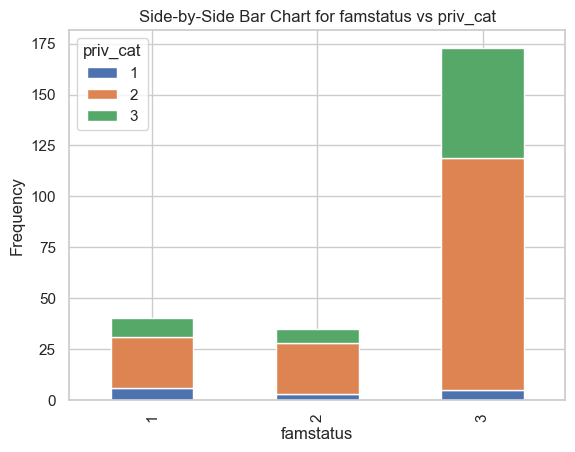

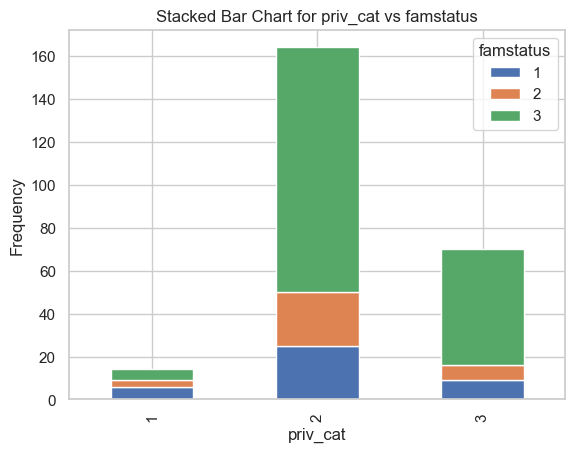

Chi-Squared Statistic: 11.138439133724827
p-value: 0.02505142595276191
Degree of freedom : 4


In [111]:
# Example usage:
chi2, p, dof = cat_cat_analysis(df, 'famstatus', 'priv_cat')
print(f'Chi-Squared Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degree of freedom : {dof}')

In [40]:
def quant_quant_analysis(data, var1, var2):
    
    sub_data = data[[var1, var2]]
    correlation_matrix = sub_data.corr()
    correlation, p_value = stats.pearsonr(sub_data[var1], sub_data[var2])
    
    print(f"correlation matrix : {correlation_matrix}")
    print(f" P-value between {var1} and {var2} is: {correlation}")

    sns.set(style="ticks")
    sns.pairplot(sub_data, kind="scatter")
    plt.suptitle(f"Scatter Plot Matrix for {var1} and {var2}")
    plt.show()


correlation matrix :                 age  education
age        1.000000  -0.116069
education -0.116069   1.000000
 P-value between age and education is: -0.11606949528571953


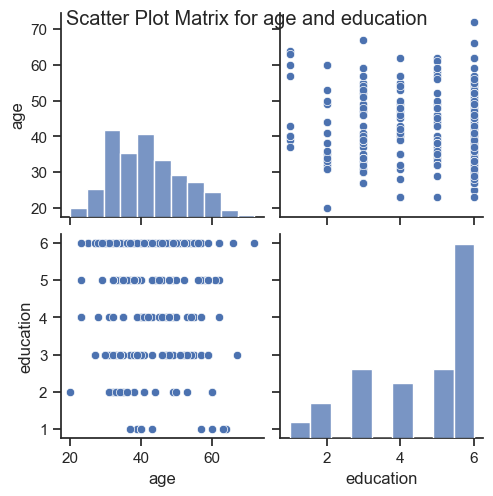

In [41]:
quant_quant_analysis(df, 'age', 'education')

In [61]:
def quant_cat_analysis(data, quant_var, cat_var):
    
    # # 从数据中获取所需的变量
    # sub_data = data[[quant_var, cat_var]]
    
    # sub_data[cat_var] = sub_data[cat_var].map({1: 'Male', 2: 'Female'})
    # # 3.1 计算组内差异的方差分析表
    # anova_table = sub_data.groupby(cat_var).apply(lambda x: stats.f_oneway(*[x[quant_var][x[cat_var] == c] for c in x[cat_var].unique()])).apply(pd.Series)

    # # 3.2 获取显著性水平（p-value）和组间方差的差异
    # p_values = anova_table["PR(>F)"]
    # significant_diff = p_values < 0.05

    # # 打印方差分析表和显著性
    # print("ANOVA table:")
    # print(anova_table)
    # print(f"Significance({quant_var} 和 {cat_var}) : {significant_diff}")

    # # 3.3 绘制分组箱线图
    # sns.set(style="whitegrid")
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x=cat_var, y=quant_var, data=sub_data, palette="Set3")

    # # 设置标题
    # plt.title(f"Grouped Boxplots for {quant_var} by {cat_var}")
    
    # plt.show()
    
    # cat_groups = data[cat_var].unique()

    # # 初始化空的方差分析表
    # anova_table = pd.DataFrame(columns=["Group", "F-statistic", "p-value"])

    # for group in cat_groups:
    #     group_data = data[data[cat_var] == group]
    #     f_statistic, p_value = stats.f_oneway(group_data[quant_var])

    #     # 将结果添加到方差分析表
    #     anova_table = anova_table.append({"Group": group, "F-statistic": f_statistic, "p-value": p_value}, ignore_index=True)

    # # 获取显著性水平（p-value）和组间方差的差异
    # p_values = anova_table["p-value"]
    # significant_diff = p_values < 0.05

    # # 打印方差分析表和显著性
    # print("ANOVA table:")
    # print(anova_table)
    # print(f"Significance({quant_var} 和 {cat_var}) : {significant_diff}")

    # # 3.3 绘制分组箱线图
    # sns.set(style="whitegrid")
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x=cat_var, y=quant_var, data=data, palette="Set3")

    # # 设置标题
    # plt.title(f"Grouped Boxplots for {quant_var} by {cat_var}")
    
    # plt.show()
    
    anova_table = pd.DataFrame(columns=['Source', 'DF', 'Sum of Squares', 'Mean Square', 'F', 'PR(>F)'])

    groups = data.groupby(cat_var)
    for group_name, group_data in groups:
        group_values = [group_data[quant_var].values for _, group_data in groups]
        f_statistic, p_value = stats.f_oneway(*group_values)
        df_between = len(groups) - 1
        df_within = len(data) - len(groups)
        ss_between = (group_data[quant_var].mean() - data[quant_var].mean()) ** 2 * len(group_data)
        ss_within = ((group_data[quant_var] - group_data[quant_var].mean()) ** 2).sum()
        ms_between = ss_between / df_between
        ms_within = ss_within / df_within
        anova_table = anova_table.append({'Source': group_name, 'DF': df_between, 'Sum of Squares': ss_between,
                                          'Mean Square': ms_between, 'F': f_statistic, 'PR(>F)': p_value},
                                          ignore_index=True)

    # 3.2 获取显著性水平（p-value）
    p_values = anova_table["PR(>F)"]
    significant_diff = p_values < 0.05

    # 打印方差分析表和显著性
    print("ANOVA table:")
    print(anova_table)
    print(f"Significance({quant_var} and {cat_var}): {significant_diff}")

    # 3.3 绘制分组箱线图
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_var, y=quant_var, data=data, palette="Set3")

    # 设置标题
    plt.title(f"Grouped Boxplots for {quant_var} by {cat_var}")

    plt.show()

ANOVA table:
   Source   DF  Sum of Squares  Mean Square         F    PR(>F)
0     0.0  1.0       25.268541    25.268541  0.401493  0.526908
1     1.0  1.0       16.232109    16.232109  0.401493  0.526908
Significance(age and sex): 0    False
1    False
Name: PR(>F), dtype: bool


/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_48918/4276373606.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_table = anova_table.append({'Source': group_name, 'DF': df_between, 'Sum of Squares': ss_between,
/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_48918/4276373606.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_table = anova_table.append({'Source': group_name, 'DF': df_between, 'Sum of Squares': ss_between,


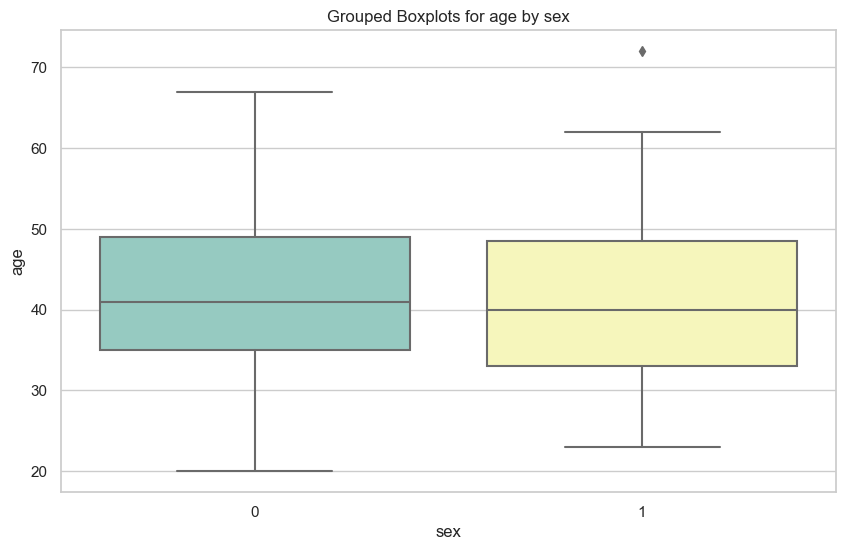

In [62]:
quant_cat_analysis(df, 'age', 'sex')

---

---

In [66]:
df_train = df.drop(['flow'], axis = 1)

In [67]:
df_test = df['flow']

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.3, random_state=42)